#### INFSCI 0019 - Final Project Data Story - 7/9/2019

**Project name:** Predicting autism spectrum disorder based on regional measures of cortical thickness  

**Project members:** Jennifer Fedor  

**Research question:**    

I am interested in determining if measures of cortical thickness in brain regions of interest can be used to classify autism spectrum disorder (ASD) from typical development (TD). Differences in cortical thickness have been reported in ASD relative to TD controls in many brain regions such as the inferior frontal and fusiform gyri, which are important for functions such as inhibitory control and visual object processing, respectively. However, these findings have been inconsistent, and limited by small sample sizes typical of neuroimaging studies. Determining if regional measures of cortical thickness are predictive of ASD could potentially provide insight into the neural bases of the disorder. This topic is particularly interesting to me because I work in a lab in the Psychiatry department that studies brain development both typically and in neurodevelopmental disorders, including autism.  

**Feature selection:**   

For my project I am using data from the Autism Brain Imaging Data Exchange (ABIDE), a neuroimaging data-sharing collaboration between 16 international sites, including Pitt. The ABIDE dataset consists of data from a total of 1112 participants, 539 with ASD and 573 TD controls, between the ages of 7 and 64 years. I am using the structural MRI data available through ABIDE, from which cortical thickness values for 70 (35 bilateral) brain regions of interest (ROIs) have already been calculated. Phenotypic data such as age, gender, and IQ is also available for each participant.  

The features I plan to use include cortical thickness values for 25 of the 70 ROIs available in the ABIDE dataset. These regions include:  
- L lateral occipital gyrus
- L superior temporal gyrus
- L and R entorhinal gyrus
- L and R fusiform gyrus
- L and R middle temporal gyrus
- L and R pars triangularis 
- L and R rostral middle frontal gyrus
- L and R superior frontal gyrus
- R caudal middle frontal gyrus
- R cuneus
- R inferior temporal gyrus
- R insula
- R isthmus of the cingulate gyrus
- R medial orbitofrontal gyrus
- R parahippocampal gyrus
- R pars orbitalis
- R posterior cingulate gyrus
- R rostral anterior cingulate gyrus
- R transverse temporal gyrus

I’ve chosen these ROIs because average cortical thickness was found to be significantly different in individuals with ASD compared to TD controls in these regions in a recent, large-scale study (van Rooij et al., 2018; see Table S8). These brain regions are important for a broad range of cognitive functions. For example, the rostral middle and inferior frontal gyri are involved in higher-order processes like the maintenance and manipulation of information in working memory (du Boisgueheneuc et al., 2006; Kikinis et al., 2010), while the cingulate cortex is important for emotion regulation, reward processing, and motivation (Hayden & Platt, 2010; Heilbronner & Hayden, 2016), and the fusiform gyrus is crucial for visual object processing, particularly for face recognition (Weiner & Zilles, 2016). Abnormalities in cortical grey matter thickness in these areas may be associated with deficits in cognitive functioning.  


**Visualizations:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# merged and cleaned data (code and raw data are in attached zip file if needed)

df = pd.read_csv('abide_compiled_data_20190707.csv')

In [3]:
df.head()

,Unnamed: 0,sub_id,site_id,file_id,dx_group,age_at_scan,sex,handedness_category,fiq,handedness_recode,...,R_precentral,R_precuneus,R_rostral_anterior_cingulate,R_rostral_middle_frontal,R_superior_frontal,R_superior_parietal,R_superior_temporal,R_supramarginal,R_transverse_temporal,R_insula
0,0,50003,PITT,Pitt_0050003,1,24.45,1,R,124.0,R,...,1.201163,2.125226,3.498914,2.340307,2.085285,0.950366,1.807719,1.565881,1.833145,3.194357
1,1,50004,PITT,Pitt_0050004,1,19.09,1,R,113.0,R,...,1.862501,2.715785,3.871004,2.626445,2.471903,1.558296,2.666532,2.430273,2.103015,4.404319
2,2,50005,PITT,Pitt_0050005,1,13.73,0,R,119.0,R,...,1.492682,2.147347,3.228483,2.539060,2.405678,1.354254,1.967489,1.721139,1.411481,3.148464
3,3,50006,PITT,Pitt_0050006,1,13.37,1,L,109.0,L,...,1.973964,3.026796,4.073865,2.855339,2.869385,1.870028,2.676286,2.531543,2.043278,3.620175
4,4,50007,PITT,Pitt_0050007,1,17.78,1,R,110.0,R,...,1.384572,2.176468,3.241596,2.278591,2.171605,1.151163,1.940420,1.956121,1.299927,2.978172


In [8]:
df.set_index(keys = 'sub_id', inplace = True)
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
df.head()

,site_id,file_id,dx_group,age_at_scan,sex,handedness_category,fiq,handedness_recode,handedness_L,handedness_Other,...,R_precentral,R_precuneus,R_rostral_anterior_cingulate,R_rostral_middle_frontal,R_superior_frontal,R_superior_parietal,R_superior_temporal,R_supramarginal,R_transverse_temporal,R_insula
sub_id,,,,,,,,,,,,,,,,,,,,,
50003,PITT,Pitt_0050003,1,24.45,1,R,124.0,R,0,0,...,1.201163,2.125226,3.498914,2.340307,2.085285,0.950366,1.807719,1.565881,1.833145,3.194357
50004,PITT,Pitt_0050004,1,19.09,1,R,113.0,R,0,0,...,1.862501,2.715785,3.871004,2.626445,2.471903,1.558296,2.666532,2.430273,2.103015,4.404319
50005,PITT,Pitt_0050005,1,13.73,0,R,119.0,R,0,0,...,1.492682,2.147347,3.228483,2.539060,2.405678,1.354254,1.967489,1.721139,1.411481,3.148464
50006,PITT,Pitt_0050006,1,13.37,1,L,109.0,L,1,0,...,1.973964,3.026796,4.073865,2.855339,2.869385,1.870028,2.676286,2.531543,2.043278,3.620175
50007,PITT,Pitt_0050007,1,17.78,1,R,110.0,R,0,0,...,1.384572,2.176468,3.241596,2.278591,2.171605,1.151163,1.940420,1.956121,1.299927,2.978172


In [10]:
# list of ROIs used as features

roi_list = ['L_entorhinal', 'L_fusiform','L_lateral_occipital','L_superior_temporal','L_middle_temporal',
            'L_rostral_middle_frontal','L_pars_triangularis','L_superior_frontal','R_entorhinal','R_fusiform',
            'R_middle_temporal','R_rostral_middle_frontal','R_pars_triangularis','R_superior_frontal',
            'R_caudal_middle_frontal','R_cuneus','R_inferior_temporal','R_insula','R_isthmus_cingulate',
            'R_medial_orbitofrontal','R_parahippocampal','R_pars_orbitalis','R_posterior_cingulate',
            'R_rostral_anterior_cingulate','R_transverse_temporal']

In [41]:
df[roi_list].describe()

,L_entorhinal,L_fusiform,L_lateral_occipital,L_superior_temporal,L_middle_temporal,L_rostral_middle_frontal,L_pars_triangularis,L_superior_frontal,R_entorhinal,R_fusiform,...,R_cuneus,R_inferior_temporal,R_insula,R_isthmus_cingulate,R_medial_orbitofrontal,R_parahippocampal,R_pars_orbitalis,R_posterior_cingulate,R_rostral_anterior_cingulate,R_transverse_temporal
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,3.641231,3.166324,2.205273,2.130499,2.919443,2.229135,1.874826,1.977640,3.610737,3.335284,...,1.737888,3.101346,3.249326,2.817488,2.680486,2.388038,2.171098,2.667784,2.957579,1.592680
std,0.673788,0.558925,0.356375,0.391502,0.453062,0.455431,0.404354,0.365752,0.731077,0.610723,...,0.349405,0.497182,0.564301,0.404640,0.466159,0.504385,0.473613,0.426235,0.653486,0.481232
min,1.587245,0.448325,0.713737,1.049168,1.190441,0.499679,0.805744,0.616719,1.048287,0.235001,...,0.635295,0.356221,1.337144,1.475801,1.248280,0.460463,0.873172,1.053847,0.840741,0.318628
25%,3.186547,2.883756,1.969914,1.851133,2.669204,1.933738,1.595427,1.752919,3.119515,3.030341,...,1.511746,2.831409,2.894574,2.531490,2.379344,2.088680,1.840958,2.376074,2.512958,1.279764
50%,3.646708,3.188739,2.190446,2.157912,2.942663,2.240497,1.854342,1.980569,3.615092,3.386864,...,1.732892,3.105523,3.273614,2.821782,2.694231,2.394144,2.181097,2.657810,2.966478,1.602756
75%,4.084534,3.504784,2.414620,2.417316,3.214097,2.535443,2.166809,2.236262,4.122764,3.708579,...,1.975691,3.397745,3.619070,3.093173,2.970054,2.738523,2.517396,2.929297,3.391410,1.885476
max,5.782763,4.864142,4.353287,3.133986,4.558113,3.759267,3.044607,3.016347,5.785809,5.094957,...,3.214619,4.876599,4.640596,3.903362,4.424286,3.964847,3.544972,4.762457,4.790833,3.062446


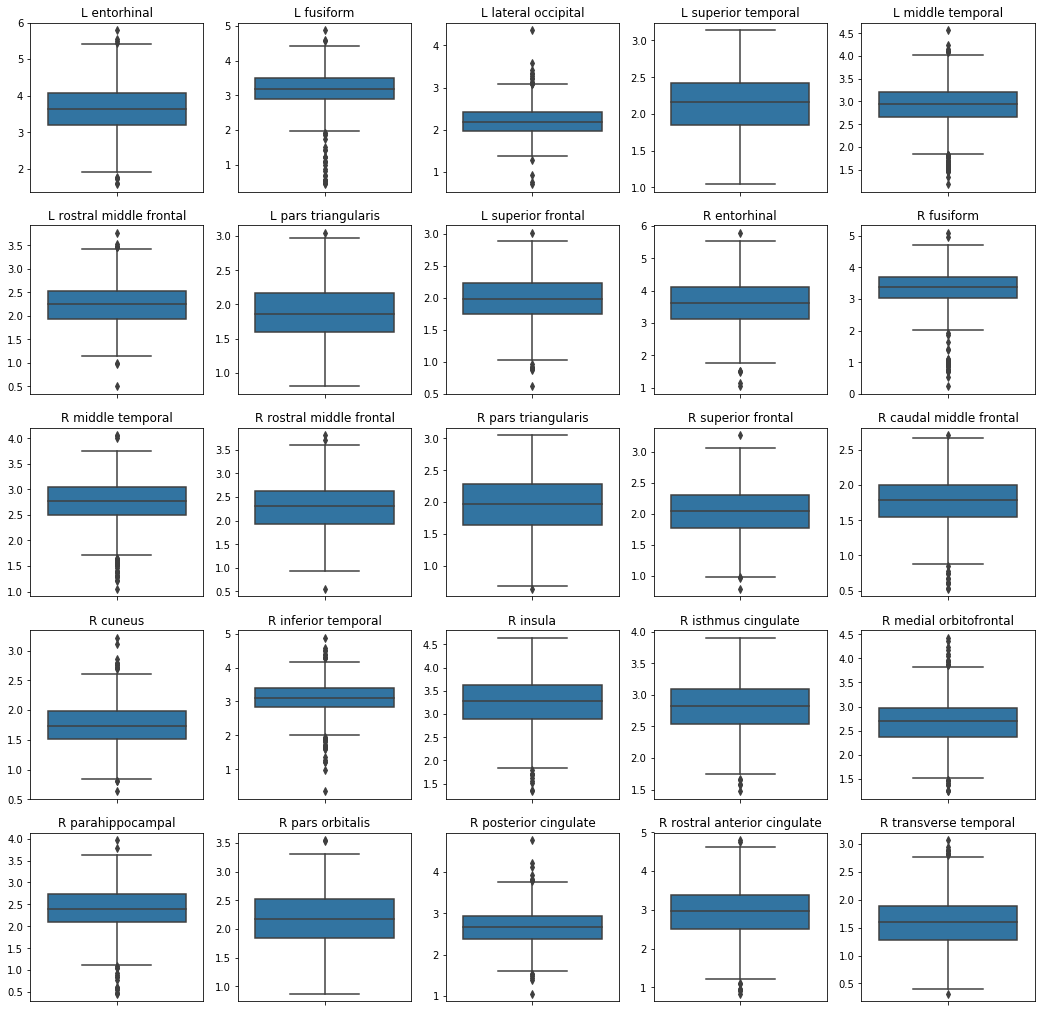

In [23]:
# check for outliers in each ROI with a boxplot

plt.figure(figsize = (18, 18)) 

for i, roi in enumerate(roi_list):
    plt.subplot(5, 5, (i+1))
    sns.boxplot(y = df[roi])
    plt.ylabel('')
    plt.title('{}'.format(roi).replace('_', ' '))

With the exception of the L superior temporal gyrus, there appear to be at least a few outliers in all of the ROIs. Although some of these outlying values appear a little suspicious (e.g., in L and R fusiform, some values are close to 0 mm, when the thickness of the cerebral cortex typically varies between 1 and 4.5 mm; Fischl & Dale, 2000), these values are not totally out of the realm of possibility, and we have no other evidence to suggest that these values are incorrect. Therefore, we should not necessarily drop these data points. However, we can investigate them further later on, and if we find that these points are influential in our model, we may consider excluding.

$~$

Text(0.5, 0, 'Diagnostic group')

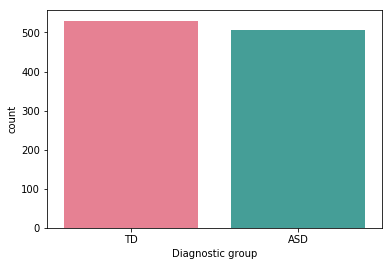

In [38]:
# check "distribution" of outcome variable

sns.countplot(x = df['dx_group'], palette = 'husl').set_xticklabels(['TD', 'ASD'])
plt.xlabel('Diagnostic group')

There are approximately equal numbers of TD controls and individuals with ASD in the final dataset. This means that randomly splitting the observations into the training and testing datasets should result in roughly equivalent numbers of participants with each outcome in each dataset.

$~$

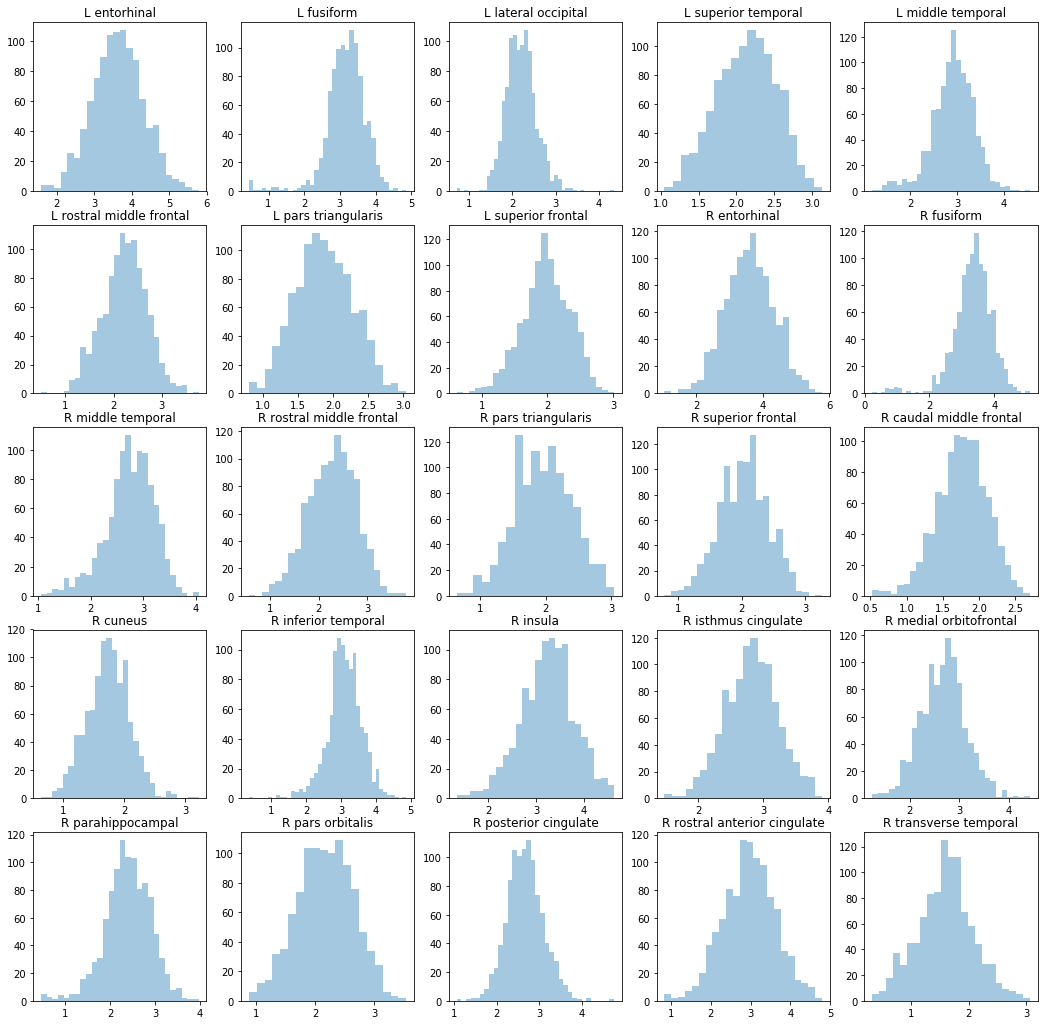

In [22]:
# check distribution of each ROI with a histogram

plt.figure(figsize = (18, 18)) 

for i, roi in enumerate(roi_list):
    plt.subplot(5, 5, (i+1))
    sns.distplot(df[roi], kde = False)
    plt.xlabel('')
    plt.title('{}'.format(roi).replace('_', ' '))

Overall, cortical thickness in each of the 25 ROIs appears relatively normally distributed. Both the L and R fusiform, the R middle temporal, the R inferior temporal ROIs appear to have a slight but noticeable left skew. However, I think that all of the data appears acceptably normal. Therefore, the normality assumption required for the naive Bayes classifier algorithm is likely met (although the independence assumption may be violated, since brain regions are inherently related to one another).

$~$

In addition to these features, I am also considering including the potential confounds of (1) age, (2) gender, (3) handedness, and (4) study site in my analysis. Cortical thickness changes with age and develops atypically in ASD (Zielinski et al., 2014), and differs across gender, with increased cortical thickness in women relative to men (Luders et al., 2006). Handedness is related to the lateralization of brain function (Gaddes, 1980). Finally, although all data in the ABIDE dataset was acquired with 3T scanners, there are likely differences in scanner parameters and sequences between centers. Since the inclusion of these features would introduce a mixture of numerical and categorical variables, SVM would probably be a more appropriate algorithm choice relative to naive Bayes.  

Alternatively, I may instead attempt to adjust the cortical thickness data for these confounds, as described in Rao et al., 2017. To do this, I would fit a linear regression model for each ROI using the confounds as predictors, and consider the residuals from each to be the data after "adjusting" for the confounds. The adjusted cortical thickness data would then be used as the input features for classification, rather than the unadjusted data and the confounding variables themselves.

$~$

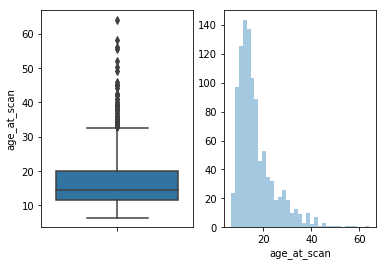

In [33]:
# age
 
f, axes = plt.subplots(1, 2)
sns.boxplot(y = 'age_at_scan', data = df, ax = axes[0])
sns.distplot(df['age_at_scan'], kde = False, ax = axes[1])

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

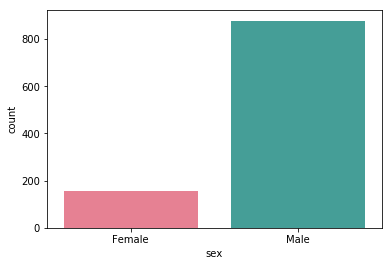

In [34]:
# gender

sns.countplot(x = df['sex'], palette = 'husl').set_xticklabels(['Female', 'Male'])

Text(0.5, 0, 'Handedness')

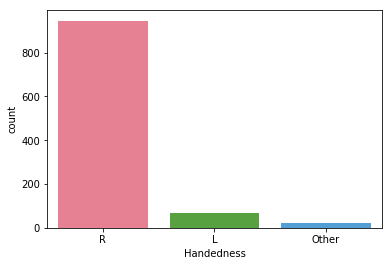

In [35]:
# handedness

sns.countplot(x = df['handedness_recode'], palette = 'husl')
plt.xlabel('Handedness')

Text(0.5, 0, 'Site ID')

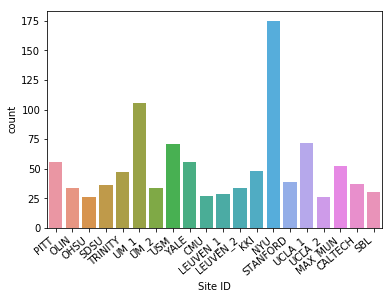

In [36]:
# site

sns.countplot(x = df['site_id']).set_xticklabels(labels = sns.countplot(x = df['site_id']).get_xticklabels(),
                                                 rotation = 40, 
                                                 ha = 'right')
plt.xlabel('Site ID')

Age is right-skewed and there appear to be quite a few outliers with ages older than mid-thirties. The proportion of males in the dataset is much higher than that of females, although this is expected due to the prevalence of autism, with about four times as many males being diagnosed with the disorder compared to females. Also somewhat expectedly, there is a larger proportion of right-handed individuals in the dataset relative to left-handed or 'other' (ambidextrous or mixed) individuals. Finally, NYU and University of Michigan (UM) contributed the largest numbers of participants to the dataset, with others contributing relatively similar but smaller amounts. This could all potentially be problematic if one group or another is disproportionately sorted into either the training or testing dataset.   

$~$

**References:**  

- du Boisgueheneuc, F., Levy, R., Volle, E., Seassau, M., Duffau, H., Kinkingnehun, S., … Dubois, B. (2006). Functions of the left superior frontal gyrus in humans: a lesion study. Brain: A Journal of Neurology, 129(Pt 12), 3315–3328. https://doi.org/10.1093/brain/awl244  
- Fischl, B., & Dale, A. M. (2000). Measuring the thickness of the human cerebral cortex from magnetic resonance images. Proceedings of the National Academy of Sciences, 97(20), 11050–11055. https://doi.org/10.1073/pnas.200033797
- Gaddes, W. H. (1980). Cerebral Dominance, Handedness, and Laterality. In W. H. Gaddes (Ed.), Learning Disabilities and Brain Function: A Neuropsychological Approach (pp. 177–204). https://doi.org/10.1007/978-1-4757-4087-5_7
- Hayden, B. Y., & Platt, M. L. (2010). Neurons in Anterior Cingulate Cortex Multiplex Information about Reward and Action. The Journal of Neuroscience : The Official Journal of the Society for Neuroscience, 30(9), 3339–3346. https://doi.org/10.1523/JNEUROSCI.4874-09.2010  
- Heilbronner, S. R., & Hayden, B. Y. (2016). Dorsal Anterior Cingulate Cortex: A Bottom-Up View. Annual Review of Neuroscience, 39, 149–170. https://doi.org/10.1146/annurev-neuro-070815-013952  
- Kikinis, Z., Fallon, J. H., Niznikiewicz, M., Nestor, P., Davidson, C., Bobrow, L., … Shenton, M. E. (2010). Gray matter volume reduction in rostral middle frontal gyrus in patients with chronic schizophrenia. Schizophrenia Research, 123(2–3), 153–159. https://doi.org/10.1016/j.schres.2010.07.027  
- Luders, E., Narr, K. L., Thompson, P. M., Rex, D. E., Woods, R. P., DeLuca, H., … Toga, A. W. (2006). Gender effects on cortical thickness and the influence of scaling. Human Brain Mapping, 27(4), 314–324. https://doi.org/10.1002/hbm.20187  
- Rao, A., Monteiro, J. M., & Mourao-Miranda, J. (2017). Predictive modelling using neuroimaging data in the presence of confounds. NeuroImage, 150, 23–49. https://doi.org/10.1016/j.neuroimage.2017.01.066
- van Rooij, D., Anagnostou, E., Arango, C., Auzias, G., Behrmann, M., Busatto, G. F., … Buitelaar, J. K. (2018). Cortical and Subcortical Brain Morphometry Differences Between Patients With Autism Spectrum Disorder and Healthy Individuals Across the Lifespan: Results From the ENIGMA ASD Working Group. The American Journal of Psychiatry, 175(4), 359–369. https://doi.org/10.1176/appi.ajp.2017.17010100  
- Weiner, K. S., & Zilles, K. (2016). The anatomical and functional specialization of the fusiform gyrus. Neuropsychologia, 83, 48–62. https://doi.org/10.1016/j.neuropsychologia.2015.06.033  
- Zielinski, B. A., Prigge, M. B. D., Nielsen, J. A., Froehlich, A. L., Abildskov, T. J., Anderson, J. S., … Lainhart, J. E. (2014). Longitudinal changes in cortical thickness in autism and typical development. Brain: A Journal of Neurology, 137(Pt 6), 1799–1812. https://doi.org/10.1093/brain/awu083  

**Data sources:** 
- ABIDE data: http://preprocessed-connectomes-project.org/abide/download.html
- Cortical parcellation labeling reference: https://mindboggle.readthedocs.io/en/latest/labels.html

In [1]:
from platform import python_version
print(python_version())

3.7.3
